# Fonctions d'ordre supérieur

## Définition
Une fonction est dite **d'ordre supérieur** si elle prend en paramètre(s) une ou plusieurs fonctions et qu'elle retourne une fonction.

## Un premier exemple issu des mathématiques

Notons $E$ l'ensemble des fonctions continues définies sur $\mathbb{R}$. Soit $x_{0}\in\mathbb{R}$ et condidérons la fonction:
$$
\begin{array}{rrcl}
\Phi: & E & \rightarrow & E\\
      & f & \mapsto & \Phi(f)
\end{array}
$$
où $$\Phi(f)(x)=\int_{x_{0}}^{x}f(t)dt$$

$\Phi(f)$ est l'unique primitive de $f$ qui s'annule en $x_{0}$.

### Première implémentation (à l'aide de la méthode des rectangles)

In [27]:
def primitive(f):
    h = 0.001 # pas dans la méthode des rectangles
    x0 = 0 # borne de gauche dans l'intégrale = val. en laquelle s'annule la primitive
    def F(x):
        H = h if x > x0 else -h # attention aux bornes
        return H * sum([f(x0 + i * H) for i in range(int((x-x0)/H))])
    return F

<IPython.core.display.Javascript object>


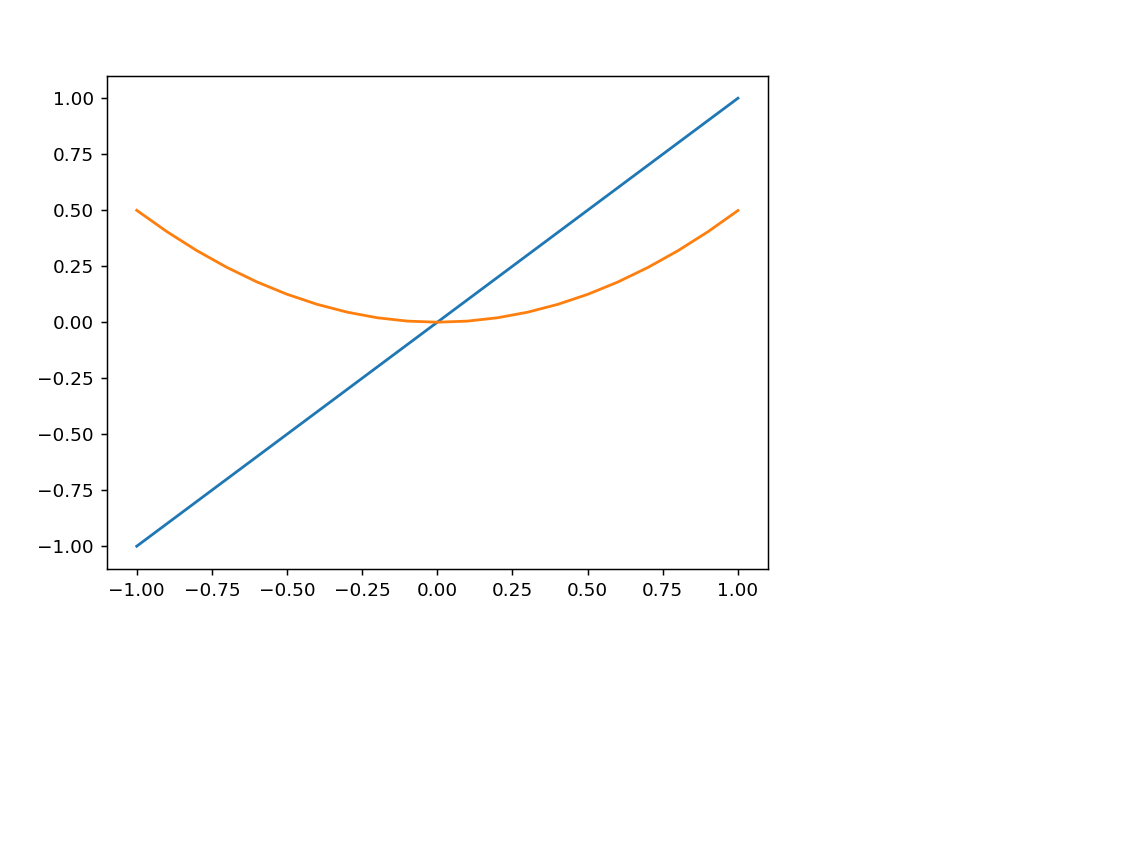

In [28]:
%matplotlib notebook

import matplotlib.pyplot as plt

def f(x):
    return x

F = primitive(f)

abscisses = np.arange(-1,1.1,0.1)
a = [f(x) for x in abscisses]
b = [F(x) for x in abscisses]

plt.plot(abscisses, a)
plt.plot(abscisses, b)
plt.show()

<IPython.core.display.Javascript object>


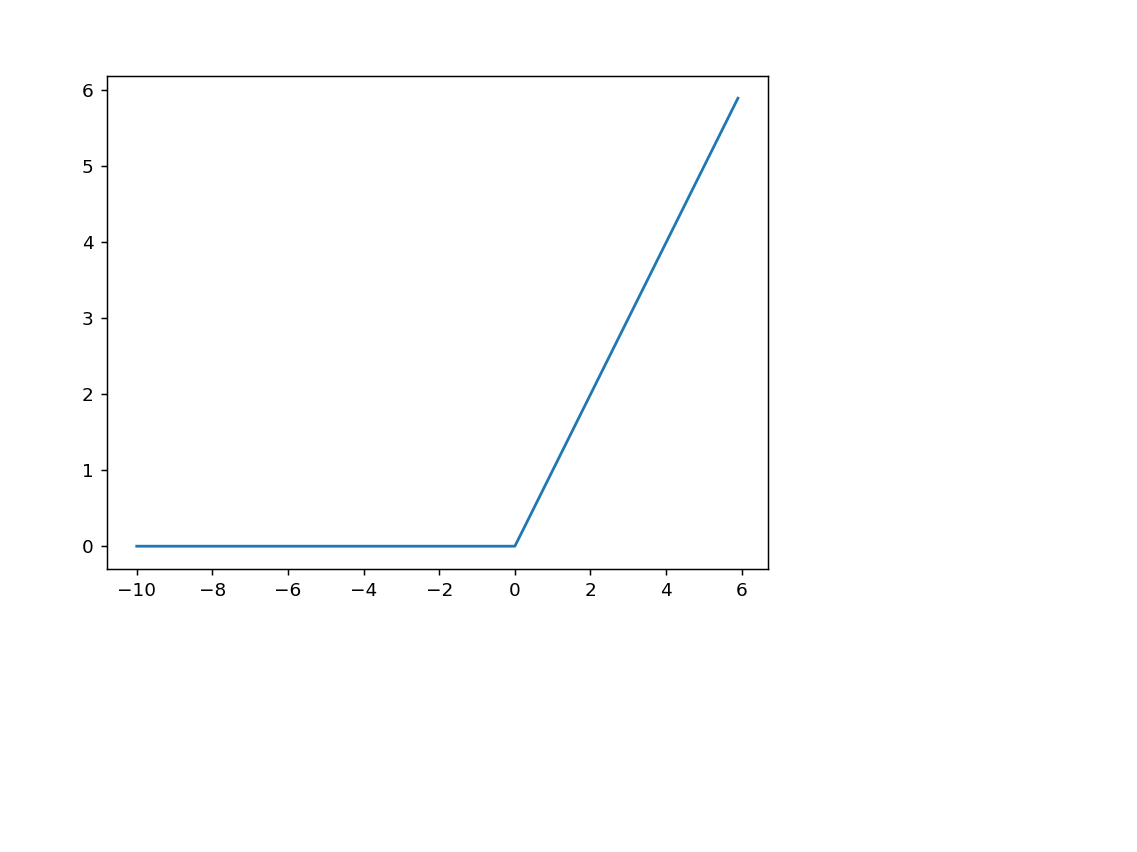

In [33]:
%matplotlib notebook

import math

@primitive
def f(x):
    return 1 if x > 0 else 0
#f = primitive(f)

X = np.arange(-10,6,0.1)
plt.plot(X, [f(x) for x in X])
#plt.plot(X, [F(x) for x in X])

plt.show()

<IPython.core.display.Javascript object>


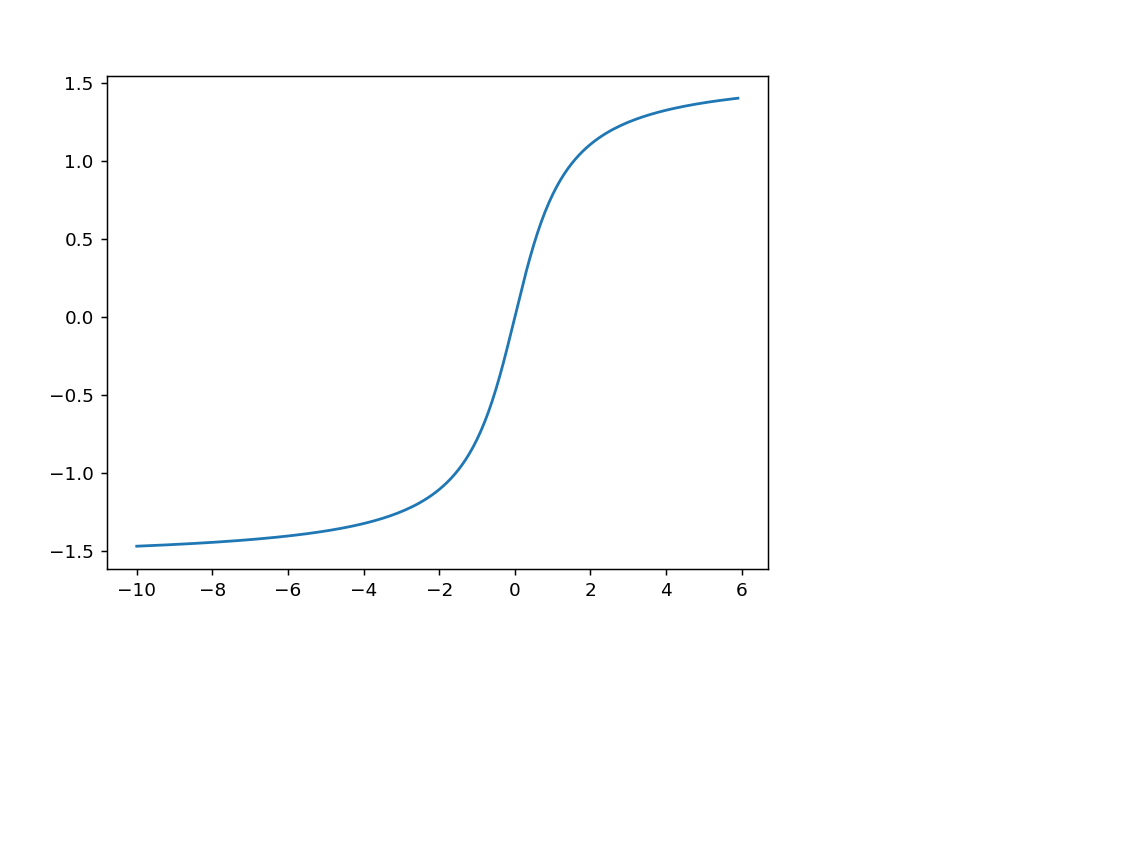

In [26]:
%matplotlib notebook

def g(x):
    return 1 / (1 + x*x)

G = primitive(g)

plt.plot(X, [G(x) for x in X])
plt.show()
